# Лабораторная работа №1: Детектирование объектов

## Задания

1. Выберите одну из моделей (YOLOv8 или Faster R-CNN).

Выбранная модель - YOLOv8.

YOLO (You Only Look Once) - модель, которая предназначена для детекции объектов и выполняет одновременное предсказание координат объектов и их классов за один проход через сеть.

Алгоритм работы YOLOv8:
- Входное изображение делится на сетку.
- Для каждого участка изображения сеть выдаёт:  
  - где находится объект (рамка),
  - какой это объект (класс),
  - насколько уверена модель, что там объект (confidence).
- Модель убирает лишние перекрывающиеся рамки, оставляя только самые точные.
- На выходе выдает набор детектированных объектов с координатами и классами.

Плюсы YOLOv8: высокая скорость работы, универсальность (детекция, классификация, сегментация), простота использования и хорошая точность.  
Минусы: сложнее детектировать очень мелкие объекты и требуется баланс между точностью и скоростью, возможны высокие требования к GPU при больших моделях.


In [13]:
!pip install ultralytics

In [2]:
from ultralytics import YOLO
from pathlib import Path
from IPython.display import Image, display
import random
import matplotlib.pyplot as plt
from PIL import Image
import json
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
model = YOLO('yolov8n.pt')
model_finetune = YOLO('yolov8n.pt')

2. Загрузите предобученную модель и примените её к набору изображений (COCO subset, Pascal VOC или небольшой кастомный датасет).

Выбранный датасет: https://www.kaggle.com/datasets/lakshaytyagi01/fruit-detection?select=Fruits-detection

Датасет включает 6 разных фруктов (яблоко, виноград, ананас, апельсин, банан и арбуз).

In [4]:
!unzip /content/fruit-detection.zip

Выходные данные были обрезаны до нескольких последних строк (5000).
  inflating: Fruits-detection/train/labels/6b179b76bb1a82b1_jpg.rf.25cb4f1d15cf69cfc930c2fcd75c3df7.txt  
  inflating: Fruits-detection/train/labels/6b179b76bb1a82b1_jpg.rf.8198f0021bcc4229646b73b71ec97c81.txt  
  inflating: Fruits-detection/train/labels/6b61ba6f4b63c410_jpg.rf.437766cf64549dafe897c657ac30b170.txt  
  inflating: Fruits-detection/train/labels/6b61ba6f4b63c410_jpg.rf.4938f9935da3999d4c08d00a80280134.txt  
  inflating: Fruits-detection/train/labels/6b94ed4e192dae14_jpg.rf.3440485e94feb5009fcafdedc93b0bf1.txt  
  inflating: Fruits-detection/train/labels/6b94ed4e192dae14_jpg.rf.b57047cb7bd63a09fc3e22a045c5941d.txt  
  inflating: Fruits-detection/train/labels/6b9b3d3309f031f6_jpg.rf.8820b30dc0dfe27b867ba24cec78da8a.txt  
  inflating: Fruits-detection/train/labels/6b9b3d3309f031f6_jpg.rf.becad7fe56b6ad24b0e43f1161523e2e.txt  
  inflating: Fruits-detection/train/labels/6ba1a6e366585a07_jpg.rf.051578a52469b8054


0: 640x640 1 person, 6.0ms
1: 640x640 1 bowl, 2 bananas, 1 dining table, 6.0ms
2: 640x640 2 persons, 1 fork, 3 bowls, 11 apples, 1 dining table, 6.0ms
Speed: 1.3ms preprocess, 6.0ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)
Results saved to /content/runs/pred_model2


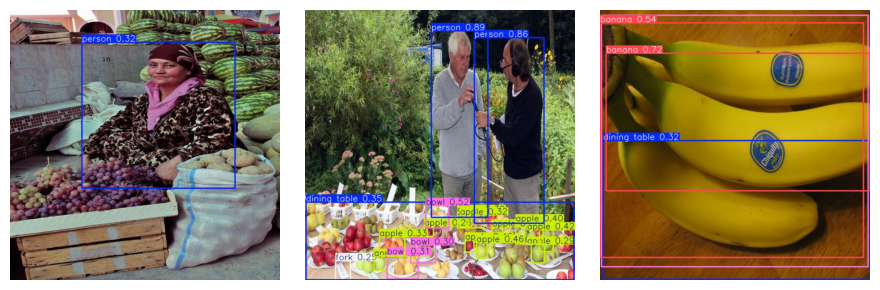

In [47]:
#выбираем тестовые изображения
all_test_images = sorted(Path('Fruits-detection/test/images').glob('*.jpg'))
sample_images = random.sample(all_test_images, k=min(3, len(all_test_images)))

#делаем предсказания моделью YOLOv8
pred = model.predict(
    source=[str(p) for p in sample_images],
    conf=0.25,
    save=True,
    save_txt=False,
    imgsz=640,
    project='runs',
    name='pred_model',
    exist_ok=True,
)

save_dir = Path(pred[0].save_dir)
files = sorted(save_dir.glob('*.jpg'))[:3]

if files:
    n = len(files)
    fig, axes = plt.subplots(1, n, figsize=(3*n, 3))
    if n == 1:
        axes = [axes]
    for ax, fp in zip(axes, files):
        ax.imshow(Image.open(fp))
        ax.axis('off')
    plt.tight_layout()
    plt.show()

3. Проведите fine-tuning на кастомном датасете (5–10 классов).

In [5]:
train_results = model_finetune.train(
    data='Fruits-detection/data.yaml',
    epochs=30,
    imgsz=640,
    batch=16,
    device='auto',
    project='runs',
    name='yolov8n_finetune',
)

Ultralytics 8.3.230 🚀 Python-3.12.12 torch-2.9.0+cu126 CUDA:auto (Tesla T4, 15095MiB)
engine/trainer: agnostic_nms=False, amp=True, augment=False, auto_augment=randaugment, batch=16, bgr=0.0, box=7.5, cache=False, cfg=None, classes=None, close_mosaic=10, cls=0.5, compile=False, conf=None, copy_paste=0.0, copy_paste_mode=flip, cos_lr=False, cutmix=0.0, data=Fruits-detection/data.yaml, degrees=0.0, deterministic=True, device=auto, dfl=1.5, dnn=False, dropout=0.0, dynamic=False, embed=None, epochs=30, erasing=0.4, exist_ok=True, fliplr=0.5, flipud=0.0, format=torchscript, fraction=0.5, freeze=None, half=False, hsv_h=0.015, hsv_s=0.7, hsv_v=0.4, imgsz=640, int8=False, iou=0.7, keras=False, kobj=1.0, line_width=None, lr0=0.01, lrf=0.01, mask_ratio=4, max_det=300, mixup=0.0, mode=train, model=yolov8n.pt, momentum=0.937, mosaic=1.0, multi_scale=False, name=yolov8n_finetune, nbs=64, nms=False, opset=None, optimize=False, optimizer=auto, overlap_mask=True, patience=100, perspective=0.0, plots=T

4. Оцените качество модели: постройте метрику mAP при разных IoU порогах.

In [49]:
def evaluate_model(model, data_yaml, split='val', imgsz=640):
    results = model.val(data=data_yaml, split=split, imgsz=imgsz, plots=True)
    metrics = {
        'mAP@0.5': float(getattr(results.box, 'map50', float('nan'))),
        'mAP@0.75': float(getattr(results.box, 'map75', float('nan'))),
        'mAP@0.5:0.95': float(getattr(results.box, 'map', float('nan'))),
    }
    return metrics

map = evaluate_model(model, 'Fruits-detection/data.yaml')
map_finetune = evaluate_model(model_finetune, 'Fruits-detection/data.yaml')

with open('metrics_base.json', 'w', encoding='utf-8') as f:
    json.dump(map, f, ensure_ascii=False, indent=2)
with open('metrics_finetune.json', 'w', encoding='utf-8') as f:
    json.dump(map_finetune, f, ensure_ascii=False, indent=2)

metrics_order = ['mAP@0.5', 'mAP@0.75', 'mAP@0.5:0.95']
df = pd.DataFrame({
    'IoU': metrics_order,
    'Model': [map[m] for m in metrics_order],
    'Fine-tuned model': [map_finetune[m] for m in metrics_order],
})

df

Ultralytics 8.3.230 🚀 Python-3.12.12 torch-2.9.0+cu126 CUDA:0 (Tesla T4, 15095MiB)
val: Fast image access ✅ (ping: 0.0±0.0 ms, read: 1963.2±418.8 MB/s, size: 65.2 KB)
val: Scanning /content/Fruits-detection/valid/labels.cache... 914 images, 0 backgrounds, 0 corrupt: 100% ━━━━━━━━━━━━ 914/914 2.0Mit/s 0.0s
val: /content/Fruits-detection/valid/images/3d3ddc3054b32eb7_jpg.rf.03e7789aaf5212e2634b84ef502e0832.jpg: 1 duplicate labels removed
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% ━━━━━━━━━━━━ 58/58 5.9it/s 9.8s
                   all        914       3227     0.0103     0.0229    0.00545    0.00317
                person        188        557     0.0066      0.104    0.00368    0.00239
               bicycle        167        390     0.0345     0.0231     0.0182     0.0136
                   car        199        809    0.00459    0.00494    0.00232    0.00169
            motorcycle        197       1100    0.00752   0.000909    0.00377

,IoU,Model,Fine-tuned model
0,mAP@0.5,0.005454,0.447485
1,mAP@0.75,0.003008,0.306979
2,mAP@0.5:0.95,0.003174,0.294023


5. Визуализируйте предсказания модели на тестовых изображениях.


0: 640x640 2 Grapes, 5.5ms
1: 640x640 1 Banana, 5.5ms
2: 640x640 9 Apples, 1 Grape, 5.5ms
Speed: 1.7ms preprocess, 5.5ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)
Results saved to /content/runs/trained_model2


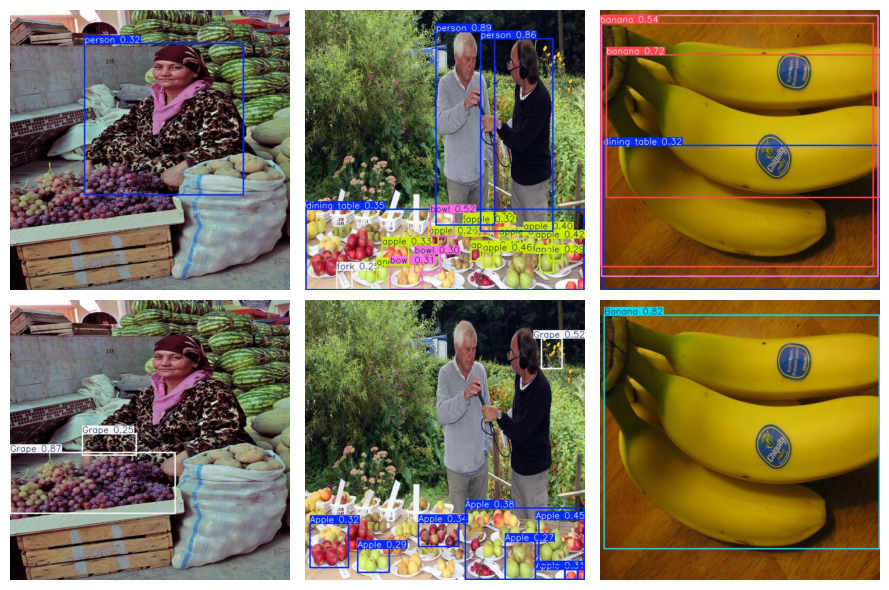

In [48]:
trained_pred = model_finetune.predict(
    source=[str(p) for p in sample_images],
    conf=0.25,
    save=True,
    save_txt=False,
    imgsz=640,
    project='runs',
    name='trained_model',
)

trained_save_dir = Path(trained_pred[0].save_dir)
trained_files = sorted(trained_save_dir.glob('*.jpg'))[:3]

if files and trained_files:
    n = min(len(files), len(trained_files))
    fig, axes = plt.subplots(2, n, figsize=(3*n, 6))
    if n == 1:
        axes = axes.reshape(2, 1)
    for j in range(n):
        axes[0, j].imshow(Image.open(files[j]))
        axes[0, j].axis('off')
        axes[1, j].imshow(Image.open(trained_files[j]))
        axes[1, j].axis('off')
    plt.tight_layout()
    plt.show()

## Вопросы

**1. Чем one-stage детекторы отличаются от two-stage?**

One-stage детекторы
- Пример: YOLO, SSD
- Как работают: сразу предсказывают координаты объектов и классы для каждой ячейки на изображении (1 этап)
- Особенности:
  - Одно проходное вычисление по изображению
  - Меньше вычислений, проще архитектура
- Минусы: чуть ниже точность для мелких объектов и сложных сцен.

Two-stage детекторы
- Пример: Faster R-CNN, Mask R-CNN
- Как работают: cначала выделяют региональные предложения, где могут быть объекты, затем классифицируют каждый регион и уточняют координаты (2 этапа)
- Особенности:
   - Медленнее, чем one-stage
   - Обычно выше точность, особенно для мелких или перекрывающихся объектов
- Минусы: высокая вычислительная сложность

**2. Какие ошибки чаще всего допускает модель при детекции?**

- Ложные срабатывания (False Positives): модель считает объект там, где его нет, часто возникает на фоне с похожими цветами/формами.

- Пропуск объектов (False Negatives): модель не заметила объект, особенно мелкие или частично закрытые объекты.

- Неправильные классы (Misclassification): объект распознан, но с неверным классом, часто у объектов схожих форм или цветов.

- Неправильные рамки (Bounding box errors): слишком маленькая/большая рамка, смещена относительно объекта.

- Проблемы с перекрытием (Overlapping objects): объекты перекрываются, модель может объединить их в один или пропустить один из них.